## Kaggle 데이터 다운로드

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length(bytes)'.format(name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length(bytes)


In [3]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction
!unzip new-york-city-taxi-fare-prediction.zip

100% 1.56G/1.56G [00:15<00:00, 53.6MB/s]
100% 1.56G/1.56G [00:15<00:00, 108MB/s] 
  0% 0.00/335k [00:00<?, ?B/s]
100% 335k/335k [00:00<00:00, 165MB/s]
  0% 0.00/960k [00:00<?, ?B/s]
100% 960k/960k [00:00<00:00, 136MB/s]
  0% 0.00/486 [00:00<?, ?B/s]
100% 486/486 [00:00<00:00, 409kB/s]
unzip:  cannot find or open new-york-city-taxi-fare-prediction.zip, new-york-city-taxi-fare-prediction.zip.zip or new-york-city-taxi-fare-prediction.zip.ZIP.


In [4]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [5]:
import os

def convert_bytes(file_path, unit=None):
  size = os.path.getsize(file_path)
  if unit == "KB":
    return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
  elif unit == "MB":
    return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
  elif unit == "GB":
    return print('File size: ' + str(round(size / (1024 * 1024 * 1024), 3)) + ' Gigabytes')
  else:
    return print('File size: ' + str(size) + ' bytes')

file_path = 'train.csv'
convert_bytes(file_path)
convert_bytes(file_path, 'GB')

File size: 5697178298 bytes
File size: 5.306 Gigabytes


In [6]:
file_list = ['train.csv', 'test.csv', 'sample_submission.csv']
for file in file_list:
  print("The {file} size: ".format(file=file))
  convert_bytes(file)
  convert_bytes(file, 'KB')
  convert_bytes(file, 'MB')
  convert_bytes(file, 'GB')
  print("--" * 5)

The train.csv size: 
File size: 5697178298 bytes
File size: 5563650.682 Kilobytes
File size: 5433.253 Megabytes
File size: 5.306 Gigabytes
----------
The test.csv size: 
File size: 983020 bytes
File size: 959.98 Kilobytes
File size: 0.937 Megabytes
File size: 0.001 Gigabytes
----------
The sample_submission.csv size: 
File size: 343271 bytes
File size: 335.226 Kilobytes
File size: 0.327 Megabytes
File size: 0.0 Gigabytes
----------


## 라이브러리 및 데이터 로드하기 불러오기

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

def skip_logic(index, skip_num):
    if index % skip_num == 0:
        return False
    return True

train = pd.read_csv('./train.csv', skiprows=lambda x: skip_logic(x, 4), parse_dates=["pickup_datetime"])
print(train.shape)
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sample_submission.csv')

(13855964, 8)


## 데이터 탐색

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13855964 entries, 0 to 13855963
Data columns (total 8 columns):
 #   Column             Dtype              
---  ------             -----              
 0   key                object             
 1   fare_amount        float64            
 2   pickup_datetime    datetime64[ns, UTC]
 3   pickup_longitude   float64            
 4   pickup_latitude    float64            
 5   dropoff_longitude  float64            
 6   dropoff_latitude   float64            
 7   passenger_count    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 845.7+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [10]:
train.head()

key  ...  passenger_count
0    2012-04-21 04:30:42.0000001  ...                1
1   2012-01-04 17:22:00.00000081  ...                1
2   2012-12-24 11:24:00.00000098  ...                3
3  2013-11-23 12:57:00.000000190  ...                1
4    2014-12-06 20:36:22.0000008  ...                1

[5 rows x 8 columns]

### fare_amount


In [11]:
print("Minimum Value of train:", train['fare_amount'].min())
print("Maximum Value of train:", train['fare_amount'].max())

Minimum Value of train: -300.0
Maximum Value of train: 93963.36


In [12]:
print("Fare Amount < 0:", sum(train['fare_amount'] < 0))
print("Fare Amount > 0:", sum(train['fare_amount'] > 0))

Fare Amount < 0: 610
Fare Amount > 0: 13855007


In [13]:
from collections import Counter
Counter(train['fare_amount'] < 0)

Counter({False: 13855354, True: 610})

In [14]:
train = train.drop(train[train['fare_amount'] < 0].index, axis=0).reset_index(drop=True)
Counter(train['fare_amount'] < 0)

Counter({False: 13855354})

In [15]:
Counter(train['fare_amount'] > 500)

Counter({False: 13855348, True: 6})

In [16]:
train = train.drop(train[train['fare_amount'] > 500].index, axis=0).reset_index(drop=True)
print("Minimum Value of train:", train['fare_amount'].min())
print("Maximum Value of train:", train['fare_amount'].max())

Minimum Value of train: 0.0
Maximum Value of train: 500.0


### Sampling

In [17]:
train['passenger_count'].unique()

array([  1,   3,   6,   2,   5,   4,   0, 208, 129,  51,   8,   9])

In [18]:
train = train.drop(train[train['passenger_count'] > 6].index, axis=0).reset_index(drop=True)
train['passenger_count'].unique()

array([1, 3, 6, 2, 5, 4, 0])

In [19]:
train = train.drop(train[train['passenger_count'] == 0].index, axis=0).reset_index(drop=True)
train['passenger_count'].unique()

array([1, 3, 6, 2, 5, 4])

In [20]:
train['passenger_count'].value_counts(normalize=True)

1    0.693959
2    0.148144
5    0.071225
3    0.044029
4    0.021383
6    0.021260
Name: passenger_count, dtype: float64

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

sample = pd.DataFrame({'group': np.repeat(['A', 'B', 'C'], (60, 40, 20)),
                   'sample_value': np.random.randn(120)})

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.7, random_state=42)

for train_index, test_index in split.split(sample, sample['group']):
  strata_train_set = sample.loc[train_index]
  test_set = sample.loc[test_index]

print(sample['group'].value_counts(normalize=True))
print(sample.shape)
print(strata_train_set['group'].value_counts(normalize=True))
print(strata_train_set.shape)

A    0.500000
B    0.333333
C    0.166667
Name: group, dtype: float64
(120, 2)
A    0.500000
B    0.333333
C    0.166667
Name: group, dtype: float64
(36, 2)


In [22]:
train.head()

key  ...  passenger_count
0    2012-04-21 04:30:42.0000001  ...                1
1   2012-01-04 17:22:00.00000081  ...                1
2   2012-12-24 11:24:00.00000098  ...                3
3  2013-11-23 12:57:00.000000190  ...                1
4    2014-12-06 20:36:22.0000008  ...                1

[5 rows x 8 columns]

In [23]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.001, random_state=42)

for large_index, sample_index in split.split(train, train['passenger_count']):
  large_df = train.loc[large_index]
  sample_df = train.loc[sample_index]

In [24]:
print("train:\n", train['passenger_count'].value_counts(normalize=True), train.shape)
print("sample:\n", sample_df['passenger_count'].value_counts(normalize=True), sample_df.shape)

train:
 1    0.693959
2    0.148144
5    0.071225
3    0.044029
4    0.021383
6    0.021260
Name: passenger_count, dtype: float64 (13806160, 8)
sample:
 1    0.693996
2    0.148113
5    0.071196
3    0.044036
4    0.021366
6    0.021294
Name: passenger_count, dtype: float64 (13807, 8)


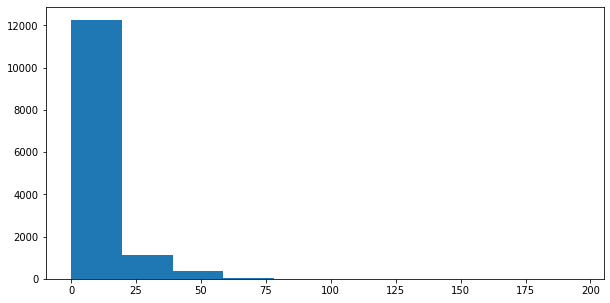

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(sample_df['fare_amount'])
plt.show()

### longitude & latitude

In [26]:
from collections import Counter
Counter(train['pickup_latitude'] < -90)

Counter({False: 13806091, True: 69})

In [27]:
Counter(train['pickup_latitude'] > 90)

Counter({False: 13805984, True: 176})

In [28]:
train = train.drop(train[train['pickup_latitude'] <- 90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_latitude'] > 90].index, axis=0).reset_index(drop=True)
Counter(train['pickup_latitude'] > 90)

Counter({False: 13805915})

In [29]:
train = train.drop(train[train['dropoff_latitude'] <- 90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['dropoff_latitude'] > 90].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_longitude'] <- 180].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['pickup_longitude'] > 180].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['dropoff_longitude'] <- 180].index, axis=0).reset_index(drop=True)
train = train.drop(train[train['dropoff_longitude'] > 180].index, axis=0).reset_index(drop=True)
train.shape

(13805499, 8)

In [30]:
train.iloc[:3, 0]

0     2012-04-21 04:30:42.0000001
1    2012-01-04 17:22:00.00000081
2    2012-12-24 11:24:00.00000098
Name: key, dtype: object

In [31]:
train.iloc[:3, 2]

0   2012-04-21 04:30:42+00:00
1   2012-01-04 17:22:00+00:00
2   2012-12-24 11:24:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]

In [32]:
train.head()

key  ...  passenger_count
0    2012-04-21 04:30:42.0000001  ...                1
1   2012-01-04 17:22:00.00000081  ...                1
2   2012-12-24 11:24:00.00000098  ...                3
3  2013-11-23 12:57:00.000000190  ...                1
4    2014-12-06 20:36:22.0000008  ...                1

[5 rows x 8 columns]

In [33]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.001, random_state=42)

for large_index, sample_index in split.split(train, train['passenger_count']):
  large_df = train.loc[large_index]
  sample_df = train.loc[sample_index]

In [34]:
sample_df.head()

key  ...  passenger_count
13585037    2014-01-25 16:41:42.0000001  ...                1
11400151    2015-06-30 13:28:21.0000006  ...                3
11073453    2014-06-27 22:35:45.0000001  ...                3
7078290     2014-11-02 22:36:14.0000001  ...                1
8266036   2013-12-12 21:20:00.000000164  ...                1

[5 rows x 8 columns]

In [35]:
# from google.colab import drive
# drive.mount('/content/drive')

In [36]:
# BASE_DIR = "/content/drive/MyDrive/Colab Notebooks/project01/Chapter03_Level03/"
# %cd "{BASE_DIR}"

In [37]:
# sample_df.to_csv("taxi_eda.csv", index=False)

In [38]:
'''
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sample_df = pd.read_csv('taxi_eda.csv', parse_dates=['pickup_datetime'])
sample_df['key'] = pd.to_datetime(sample_df['key'])
sample_df.info()
'''

"\nimport numpy as np\nimport pandas as pd\nimport seaborn as sns \nimport matplotlib.pyplot as plt\n\nsample_df = pd.read_csv('taxi_eda.csv', parse_dates=['pickup_datetime'])\nsample_df['key'] = pd.to_datetime(sample_df['key'])\nsample_df.info()\n"

In [39]:
Bounding_Box = (-74.5, -72.8, 40.5, 41.8) 

def select_within_boundingbox(data, BB):
    return (data.pickup_longitude >= BB[0]) & (data.pickup_longitude <= BB[1]) & \
           (data.pickup_latitude >= BB[2]) & (data.pickup_latitude <= BB[3]) & \
           (data.dropoff_longitude >= BB[0]) & (data.dropoff_longitude <= BB[1]) & \
           (data.dropoff_latitude >= BB[2]) & (data.dropoff_latitude <= BB[3])

print('Old size: %d' % len(sample_df))
sample_df = sample_df[select_within_boundingbox(sample_df, Bounding_Box)]
print('New size: %d' % len(sample_df))

Old size: 13806
New size: 13499


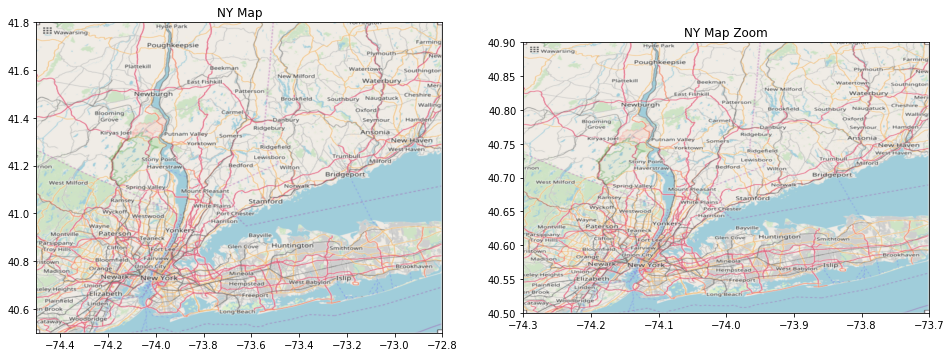

In [40]:
import ssl
from urllib.request import urlopen
context = ssl._create_unverified_context() 

# load image of NYC map
Bounding_Box = (-74.5, -72.8, 40.5, 41.8)
NYC_MAP_img_path = 'https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png'
NYC_MAP = urlopen(NYC_MAP_img_path, context=context)
nyc_map = plt.imread(NYC_MAP)

# load extra image to zoom in on NYC
Bounding_Box_Zoom = (-74.3, -73.7, 40.5, 40.9)
NYC_MAP_ZOOM_img_path = 'https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png'
NYC_MAP_ZOOM = urlopen(NYC_MAP_img_path, context=context)
nyc_map_zoom = plt.imread(NYC_MAP_ZOOM)

fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].imshow(nyc_map, zorder=0, extent=Bounding_Box)
ax[0].set_title("NY Map")

ax[1].imshow(nyc_map_zoom, zorder=0, extent=Bounding_Box_Zoom)
ax[1].set_title("NY Map Zoom")

plt.show()

In [41]:
# this function will be used more often to plot data on the NYC map
def scatter_plot_on_map(df, Bounding_Box, nyc_map, s=10, alpha=0.2):
    fig, ax = plt.subplots(1, 2, figsize=(16,10))
    ax[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    ax[0].set_xlim((Bounding_Box[0], Bounding_Box[1]))
    ax[0].set_ylim((Bounding_Box[2], Bounding_Box[3]))
    ax[0].set_title('Pickup locations')
    ax[0].imshow(nyc_map, zorder=0, extent=Bounding_Box)

    ax[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    ax[1].set_xlim((Bounding_Box[0], Bounding_Box[1]))
    ax[1].set_ylim((Bounding_Box[2], Bounding_Box[3]))
    ax[1].set_title('Dropoff locations')
    ax[1].imshow(nyc_map, zorder=0, extent=Bounding_Box)

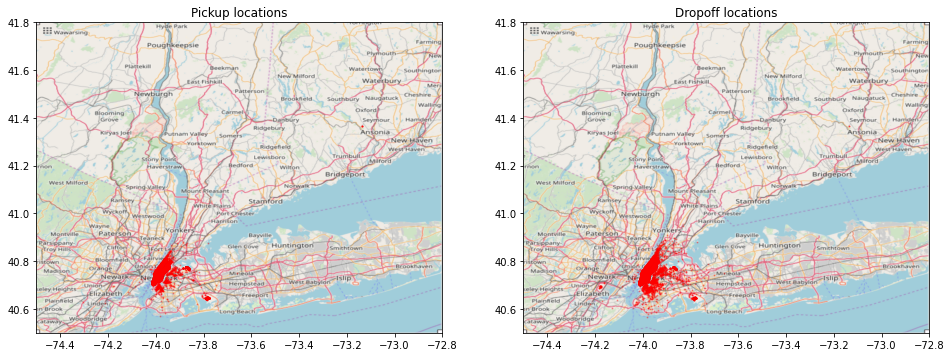

In [42]:
# plot training data on map
scatter_plot_on_map(sample_df, Bounding_Box, nyc_map, s=1, alpha=0.3)

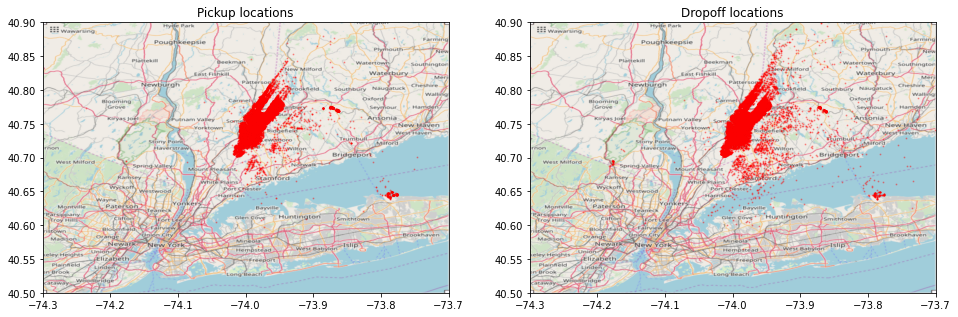

In [43]:
scatter_plot_on_map(sample_df, Bounding_Box_Zoom, nyc_map_zoom, s=1, alpha=0.3)

In [44]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13499 entries, 13585037 to 6168861
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                13499 non-null  object             
 1   fare_amount        13499 non-null  float64            
 2   pickup_datetime    13499 non-null  datetime64[ns, UTC]
 3   pickup_longitude   13499 non-null  float64            
 4   pickup_latitude    13499 non-null  float64            
 5   dropoff_longitude  13499 non-null  float64            
 6   dropoff_latitude   13499 non-null  float64            
 7   passenger_count    13499 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 949.1+ KB


### Date
- 날짜 변동

In [45]:
sample_df['Year'] = sample_df['pickup_datetime'].dt.year
sample_df['Month'] = sample_df['pickup_datetime'].dt.month
sample_df['Date'] = sample_df['pickup_datetime'].dt.day
sample_df['Day of Week'] = sample_df['pickup_datetime'].dt.dayofweek
sample_df['Hour'] = sample_df['pickup_datetime'].dt.hour

In [46]:
print(sample_df.iloc[:, 8:])

          Year  Month  Date  Day of Week  Hour
13585037  2014      1    25            5    16
11400151  2015      6    30            1    13
11073453  2014      6    27            4    22
8266036   2013     12    12            3    21
42664     2015      1    14            2    11
...        ...    ...   ...          ...   ...
12538416  2012      3    16            4    20
9310708   2012     10    16            1    19
12218000  2014      5    27            1    13
6983390   2015      1    16            4     8
6168861   2013      4     1            0    12

[13499 rows x 5 columns]


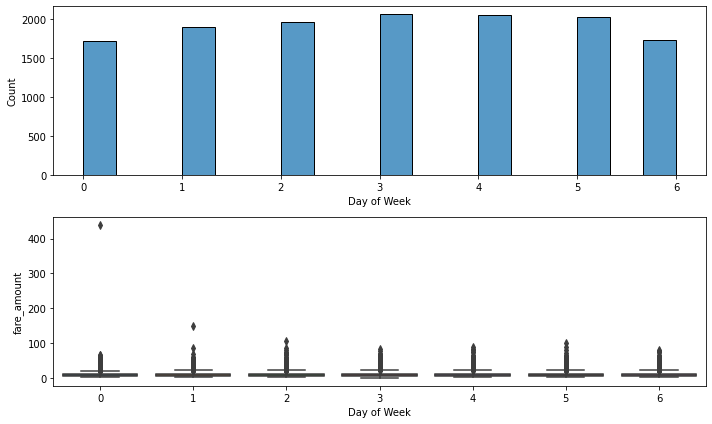

In [47]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(10, 6))
sns.histplot(sample_df['Day of Week'], ax=ax[0])
ax[0].set_xlabel('Day of Week')
ax[0].set_ylabel('Count')

sns.boxplot(x = 'Day of Week', y = 'fare_amount', data=sample_df, ax=ax[1])
ax[1].set_xlabel('Day of Week')

fig.tight_layout()
plt.show()

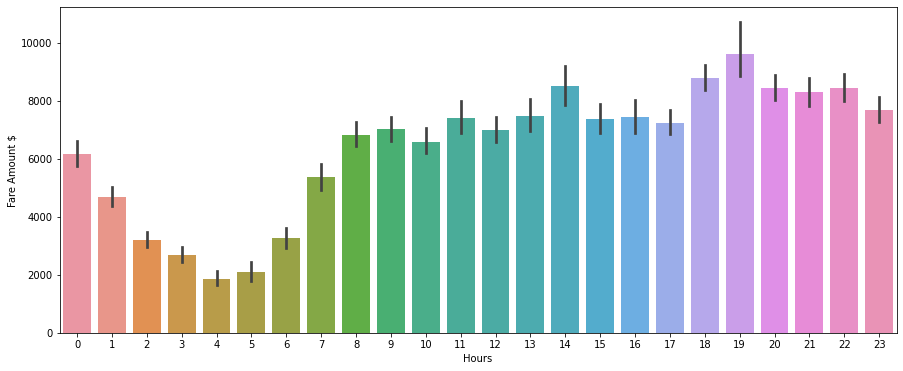

In [48]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x = 'Hour', y = 'fare_amount', data=sample_df, estimator=sum)
ax.set_xlabel('Hours')
ax.set_ylabel('Fare Amount $')

plt.show()

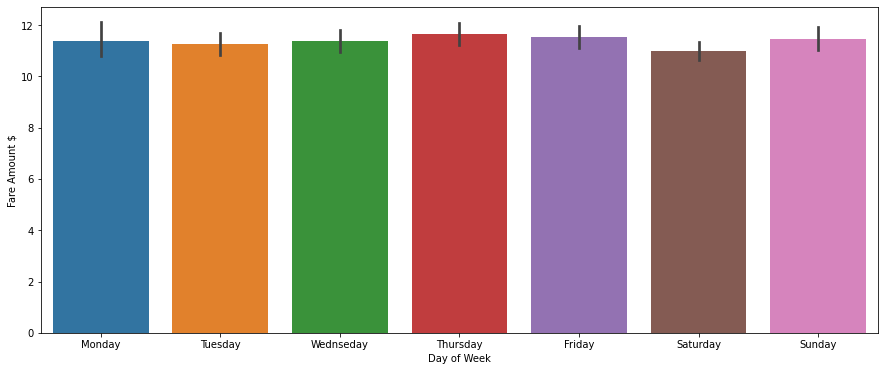

In [49]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x = 'Day of Week', y = 'fare_amount', data=sample_df)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Fare Amount $')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednseday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

## Feature Engineering

### 결측치 및 이상치 삭제

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [51]:
def skip_logic(index, skip_num):
    if index % skip_num == 0:
        return False
    return True

train = pd.read_csv('./train.csv', skiprows=lambda x: skip_logic(x, 1000))
print(train.shape)
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./sample_submission.csv')

(55423, 8)


In [52]:
print("Longitude Boundary in test")
print("Minimum Value of Longitude:", min(test.pickup_longitude.min(), test.dropoff_longitude.min()))
print("Maximum Value of Longitude:", max(test.pickup_longitude.max(), test.dropoff_longitude.max()))

Longitude Boundary in test
Minimum Value of Longitude: -74.263242
Maximum Value of Longitude: -72.986532


In [53]:
print("Latitude Boundary in test")
print("Minimum Value of Latitude:", min(test.pickup_latitude.min(), test.pickup_latitude.min()))
print("Maximum Value of Latitude:", max(test.pickup_latitude.max(), test.pickup_latitude.max()))

Latitude Boundary in test
Minimum Value of Latitude: 40.573143
Maximum Value of Latitude: 41.709555


In [54]:
def preprocssing(data):
  print("Old Shape Size:", data.shape)  

  # Remove Missing Value
  data = data.drop(data[data.isnull().any(1)].index, axis = 0)

  # Removing Outliers
  if 'fare_amount' in data.columns:
    data = data.drop(data[data['fare_amount'] < 0].index, axis=0).reset_index(drop=True)
    data = data.drop(data[data['fare_amount'] > 500].index, axis=0).reset_index(drop=True)

    # Removing Beyond NYC
    # 1 is beyond NY, so will delete
    boundary={'min_lng':-74.263242,'min_lat':40.573143,'max_lng':-72.986532, 'max_lat':41.709555}
    data.loc[~((data.pickup_longitude >= boundary['min_lng'] ) & (data.pickup_longitude <= boundary['max_lng']) &
            (data.pickup_latitude >= boundary['min_lat']) & (data.pickup_latitude <= boundary['max_lat']) &
            (data.dropoff_longitude >= boundary['min_lng']) & (data.dropoff_longitude <= boundary['max_lng']) &
            (data.dropoff_latitude >=boundary['min_lat']) & (train.dropoff_latitude <= boundary['max_lat'])),'is_beyond_NY']=1

    data.loc[((data.pickup_longitude >= boundary['min_lng'] ) & (data.pickup_longitude <= boundary['max_lng']) &
            (data.pickup_latitude >= boundary['min_lat']) & (data.pickup_latitude <= boundary['max_lat']) &
            (data.dropoff_longitude >= boundary['min_lng']) & (data.dropoff_longitude <= boundary['max_lng']) &
            (data.dropoff_latitude >=boundary['min_lat']) & (data.dropoff_latitude <= boundary['max_lat'])),'is_beyond_NY']=0
    print("Outlier vs Non Outlier Counts")
    print(data['is_beyond_NY'].value_counts())
    # print(data[data['is_beyond_NY'] == 1.0].head())
    data = data.drop(data[data['is_beyond_NY']== 1.0].index, axis=0).reset_index(drop=True)
    data.drop(['is_beyond_NY'], axis=1, inplace=True)
  
  data = data.drop(data[data['passenger_count'] > 6].index, axis=0).reset_index(drop=True)
  data = data.drop(data[data['passenger_count'] == 0].index, axis=0).reset_index(drop=True)
  data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

  # new variables from pickup_datetime
  data['year'] = data['pickup_datetime'].dt.year
  data['month'] = data['pickup_datetime'].dt.month
  data['date'] = data['pickup_datetime'].dt.day
  data['day_of_week'] = data['pickup_datetime'].dt.dayofweek
  data['hour'] = data['pickup_datetime'].dt.hour
  
  # Delete Some Variables
  data.drop(['key','pickup_datetime'], axis=1, inplace=True)

  print("New Shape Size:", data.shape)
  return data

In [55]:
new_train = preprocssing(train)
new_train

Old Shape Size: (55423, 8)
Outlier vs Non Outlier Counts
0.0    54190
1.0     1230
Name: is_beyond_NY, dtype: int64
New Shape Size: (53997, 11)


fare_amount  pickup_longitude  pickup_latitude  ...  date  day_of_week  hour
0             10.9        -73.988455        40.758432  ...    18            4    18
1              7.5        -73.991776        40.726189  ...     1            6     2
2             56.8        -73.988152        40.740112  ...    23            1     7
3             14.5        -73.984455        40.759038  ...    31            5    22
4             13.3        -73.983301        40.743722  ...    28            0    18
...            ...               ...              ...  ...   ...          ...   ...
53992         10.5        -73.984875        40.729762  ...     3            6    22
53993         17.5        -73.984185        40.749052  ...    22            5     3
53994          8.5        -73.971578        40.755180  ...    14            0     8
53995         14.9        -73.999957        40.678620  ...     5            2     7
53996          8.0        -73.972532        40.765390  ...    13            1    15

[53997 rows x 11 columns]

### 하버사인

In [56]:
!pip install haversine

In [57]:
from haversine import haversine, Unit
seoul = (37.532600, 127.024612)
busan = (35.114839, 129.041494)

haversine(seoul, busan)

323.89975226124534

In [58]:
distances = []
pick_lon = new_train['pickup_longitude'].tolist()
pick_lat = new_train['pickup_latitude'].tolist()
drop_lon = new_train['dropoff_longitude'].tolist()
drop_lat = new_train['dropoff_latitude'].tolist()

for row in range(len(new_train)):
  dist = haversine((pick_lat[row], pick_lon[row]), (drop_lat[row], drop_lon[row]))
  distances.append(dist)

new_train['distance'] = distances
print(new_train[['fare_amount', 'distance', 'passenger_count']])

       fare_amount   distance  passenger_count
0             10.9   3.169341                1
1              7.5   1.488336                5
2             56.8  20.220492                2
3             14.5   6.144112                2
4             13.3   3.992399                1
...            ...        ...              ...
53992         10.5   2.361989                1
53993         17.5   6.241498                1
53994          8.5   0.715686                1
53995         14.9   5.597480                1
53996          8.0   1.118084                1

[53997 rows x 3 columns]


### 위도 경도 데이터 삭제

In [59]:
new_train.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)

In [60]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53997 entries, 0 to 53996
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      53997 non-null  float64
 1   passenger_count  53997 non-null  int64  
 2   year             53997 non-null  int64  
 3   month            53997 non-null  int64  
 4   date             53997 non-null  int64  
 5   day_of_week      53997 non-null  int64  
 6   hour             53997 non-null  int64  
 7   distance         53997 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 3.3 MB


## CV + Grid Search

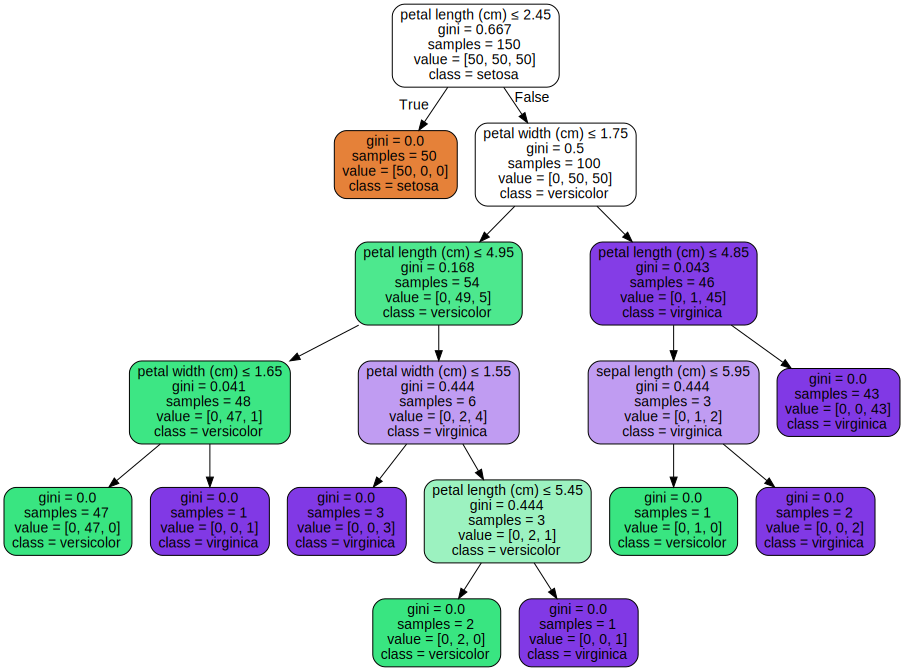

In [61]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
iris = load_iris()
X_features = iris.data
y_target = iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_features, y_target)
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph
# graph.render("iris")

In [62]:
print(clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


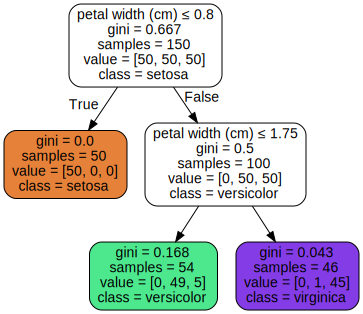

In [63]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_features, y_target)
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph
# graph.render("iris")

In [64]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=42)

tree = DecisionTreeClassifier()

grid_search_params = {'max_depth': [1, 2], 
                     'max_features': [1, 2]}

grid_tree = GridSearchCV(tree, param_grid=grid_search_params, cv = 5)
grid_tree.fit(X_train, y_train)

scores = pd.DataFrame(grid_tree.cv_results_)
scores[['params', 'mean_test_score', 'rank_test_score']]

params  mean_test_score  rank_test_score
0  {'max_depth': 1, 'max_features': 1}         0.625000                3
1  {'max_depth': 1, 'max_features': 2}         0.625000                4
2  {'max_depth': 2, 'max_features': 1}         0.783333                2
3  {'max_depth': 2, 'max_features': 2}         0.916667                1

In [65]:
from scipy.stats import randint
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=42)

tree = DecisionTreeClassifier()

random_search_params = {'max_depth': randint(1, 5), 
                     'max_features': randint(1, 4)}

random_tree = RandomizedSearchCV(tree, random_search_params, cv = 5)
random_tree.fit(X_train, y_train)

scores = pd.DataFrame(random_tree.cv_results_)
scores[['params', 'mean_test_score', 'rank_test_score']]

params  mean_test_score  rank_test_score
0  {'max_depth': 1, 'max_features': 3}         0.675000                7
1  {'max_depth': 2, 'max_features': 1}         0.783333                6
2  {'max_depth': 2, 'max_features': 2}         0.866667                3
3  {'max_depth': 1, 'max_features': 1}         0.658333               10
4  {'max_depth': 3, 'max_features': 2}         0.950000                1
5  {'max_depth': 1, 'max_features': 3}         0.675000                7
6  {'max_depth': 4, 'max_features': 1}         0.841667                4
7  {'max_depth': 2, 'max_features': 1}         0.825000                5
8  {'max_depth': 4, 'max_features': 2}         0.950000                1
9  {'max_depth': 1, 'max_features': 2}         0.675000                7

## Modeling

### Library

In [66]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from math import sqrt
import time
import datetime 

### train_test_split

In [67]:
y = new_train['fare_amount']
new_train.drop(['fare_amount'], axis=1, inplace=True)
X = new_train
X.shape, y.shape

((53997, 7), (53997,))

### XGboost

In [68]:
new_test = preprocssing(test)

distances = []
pick_lon = new_test['pickup_longitude'].tolist()
pick_lat = new_test['pickup_latitude'].tolist()
drop_lon = new_test['dropoff_longitude'].tolist()
drop_lat = new_test['dropoff_latitude'].tolist()

for row in range(len(new_test)):
  dist = haversine((pick_lat[row], pick_lon[row]), (drop_lat[row], drop_lon[row]))
  distances.append(dist)

new_test['distance'] = distances
new_test.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)

Old Shape Size: (9914, 7)
New Shape Size: (9914, 10)


In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((43197, 7), (10800, 7), (43197,), (10800,))

In [70]:
params = {'max_depth':5,
          'learning_rate':0.5,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'early_stopping_rounds':5
         }
      
xgb_model = xgb.XGBRegressor(**params)
print(xgb_model)
start = time.time()

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

sec = time.time() - start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=5,
             eval_metric='rmse', gamma=0, importance_type='gain',
             learning_rate=0.5, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)
[03:48:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8.19605
[1]	validation_0-rmse:5.49488
[2]	validation_0-rmse:4.56644
[3]	validation_0-rmse:4.28582
[4]	validation_0-rmse:4.24593
[5]	validation_0-rmse:4.25462
[6]	validation_0-rmse:4.26433
[7]	validation_0-rmse:4.27621
[8]	validation_0-rmse:4.30134
[9]	validation_0-rmse:4.27761
[10]	validation_0-rmse:4.2712
[11

In [71]:
y_pred_xgb = xgb_model.predict(new_test)
print(y_pred_xgb)

[10.515442  10.8846245  4.544116  ... 60.49668   25.85212    6.05947  ]


#### Feature Importance Plot

Text(0.5, 0, 'Permutation Importance')

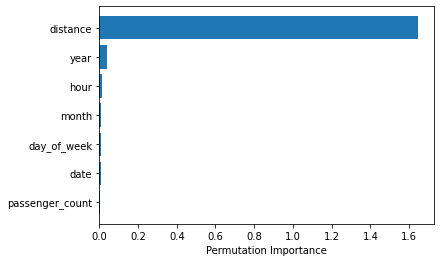

In [72]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xgb_model, X_val, y_val)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [73]:
submission['fare_amount'] = y_pred_xgb
submission.to_csv('final_submission.csv', index=False)

In [74]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f final_submission.csv -m "Message"

100% 370k/370k [00:00<00:00, 1.42MB/s]
Successfully submitted to New York City Taxi Fare Prediction

### LightGBM

In [75]:
params = {'max_depth':5,
          'learning_rate':0.5,
          'objective':'regression',
          'metric':'rmse',
          'early_stopping_rounds':5
         }

start = time.time()
lgb_model = lgb.LGBMRegressor(**params)
print(lgb_model)
lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

sec = time.time() - start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

y_pred_lgb = lgb_model.predict(new_test)
print(y_pred_xgb)

submission['fare_amount'] = y_pred_lgb
submission.to_csv('lightgbm_final_submission.csv', index=False)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              early_stopping_rounds=5, importance_type='split',
              learning_rate=0.5, max_depth=5, metric='rmse',
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)
[1]	valid_0's rmse: 6.13213
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's rmse: 4.80094
[3]	valid_0's rmse: 4.3899
[4]	valid_0's rmse: 4.26092
[5]	valid_0's rmse: 4.21729
[6]	valid_0's rmse: 4.21778
[7]	valid_0's rmse: 4.21239
[8]	valid_0's rmse: 4.23947
[9]	valid_0's rmse: 4.25212
[10]	valid_0's rmse: 4.25856
[11]	valid_0's rmse: 4.2604
[12]	valid_0's rmse: 4.28108
Early stopping, best iteration is:
[7]	valid_0's rmse: 4.21239
0:00:00
[10

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


#### Feature Importance Plot

Text(0.5, 0, 'Permutation Importance')

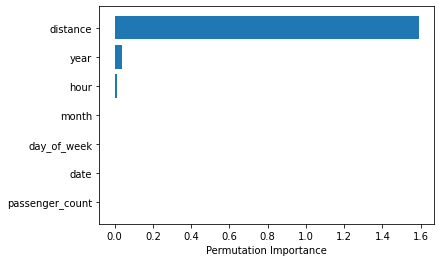

In [76]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(lgb_model, X_val, y_val)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [77]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f lightgbm_final_submission.csv -m "Message"

100% 454k/454k [00:00<00:00, 2.15MB/s]
Successfully submitted to New York City Taxi Fare Prediction

### Catboost

In [78]:
!pip install catboost

     |████████████████████████████████| 67.3MB 66kB/s 


In [79]:
from catboost import CatBoostRegressor
params = {'depth':5,
          'learning_rate':0.5,
          'eval_metric':'RMSE',
          'early_stopping_rounds':5
         }

start = time.time()
cat_model = CatBoostRegressor(**params)
cat_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=True)

sec = time.time() - start
times = str(datetime.timedelta(seconds=sec)).split(".")
times = times[0]
print(times)

y_pred_cat = cat_model.predict(new_test)
print(y_pred_cat)

submission['fare_amount'] = y_pred_xgb
submission.to_csv('catboost_final_submission.csv', index=False)

0:	learn: 6.5270465	test: 6.4783004	best: 6.4783004 (0)	total: 55ms	remaining: 55s
1:	learn: 5.2689682	test: 5.0919990	best: 5.0919990 (1)	total: 61.4ms	remaining: 30.6s
2:	learn: 4.7986472	test: 4.6333005	best: 4.6333005 (2)	total: 67.6ms	remaining: 22.5s
3:	learn: 4.5979235	test: 4.4403268	best: 4.4403268 (3)	total: 73.9ms	remaining: 18.4s
4:	learn: 4.4924420	test: 4.3327791	best: 4.3327791 (4)	total: 80.2ms	remaining: 16s
5:	learn: 4.4326904	test: 4.3061620	best: 4.3061620 (5)	total: 86.3ms	remaining: 14.3s
6:	learn: 4.4058228	test: 4.3009413	best: 4.3009413 (6)	total: 93.1ms	remaining: 13.2s
7:	learn: 4.3792239	test: 4.3005755	best: 4.3005755 (7)	total: 99.5ms	remaining: 12.3s
8:	learn: 4.3668696	test: 4.3181492	best: 4.3005755 (7)	total: 106ms	remaining: 11.7s
9:	learn: 4.3374818	test: 4.2843097	best: 4.2843097 (9)	total: 113ms	remaining: 11.2s
10:	learn: 4.3170002	test: 4.2842661	best: 4.2842661 (10)	total: 125ms	remaining: 11.2s
11:	learn: 4.3080276	test: 4.2851028	best: 4.28426

#### Feature Importance Plot

Text(0.5, 0, 'Permutation Importance')

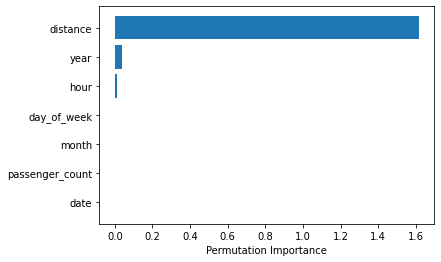

In [80]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(cat_model, X_val, y_val)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [81]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f catboost_final_submission.csv -m "Message"

100% 370k/370k [00:00<00:00, 1.75MB/s]
Successfully submitted to New York City Taxi Fare Prediction

### Simple Stacking Ensemble

In [82]:
ensembled_prediction = (0.3 * y_pred_xgb) + (0.4 * y_pred_lgb) + (0.3 * y_pred_cat)

submission.to_csv('ensembled_final_submission.csv', index=False)
submission.head(10)

key  fare_amount
0  2015-01-27 13:08:24.0000002    10.515442
1  2015-01-27 13:08:24.0000003    10.884624
2  2011-10-08 11:53:44.0000002     4.544116
3  2012-12-01 21:12:12.0000002     8.347191
4  2012-12-01 21:12:12.0000003    16.932850
5  2012-12-01 21:12:12.0000005    11.803183
6  2011-10-06 12:10:20.0000001     5.735718
7  2011-10-06 12:10:20.0000003    51.927792
8  2011-10-06 12:10:20.0000002    12.292977
9  2014-02-18 15:22:20.0000002     7.252489

In [83]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f ensembled_final_submission.csv -m "Message"

100% 370k/370k [00:00<00:00, 1.43MB/s]
Successfully submitted to New York City Taxi Fare Prediction